# Описание проекта

 Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.  
 
 Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

# План проекта

Шаг 1. Загрузка библиотек и данных

Шаг 2. Исследовательский анализ данных

   - Шаг 2.1. Проверка данных на пропуски, изучение средних значений и стандартных отклонений
   - Шаг 2.2. Средние значения в группах тех кто ушел/остался
   - Шаг 2.3. Гистограммы признаков в грппах тех кто ушел/остался
   - Шаг 2.4. Матрица корреляций
 
Шаг 3. Построение модели прогнозирования оттока клиентов

Шаг 4. Кластеризация клиентов

   - Шаг 4.1. Построение матрицу расстояний и отрисовка дендограммы
   - Шаг 4.2. Обучение модели кластеризации
   - Шаг 4.3. Анализ полученных кластеров


# Шаг 1. Загрузка библиотек и данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/проекты/ml_project/gym_churn.csv')

In [3]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Шаг 2.1. Проверка данных на пропуски, изучение средних значений и стандартных отклонений

Проверим на наличие пропусков, дубликатов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

Изучим средние значения и стандартные отклонения переменных

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В исходных данных не обнаружено пропусков и дубликатов. 
По средним значениям и среднему отклонению пока нельзя сделать каких-то выводов, но стоит заметить следующее:  
- Мужчин и женщин практически поровну
- Большинство клиентов проживают или работают в районе фитнес-клуба
- Около половины клиентов являются сотрудниками компании-партнера
- Около трети клиентов пришли по промокоду
- Немного меньше половины клиентов посещают групповые занятия
- Подавляющая часть клиентов в возрасте от 27 до 30 лет

Остальные переменные требуют более детального рассмотрения

## Шаг 2.2. Средние значения в группах тех кто ушел/остался

Для наглядности построим сводную таблицу

In [7]:
df.pivot_table(columns = 'Churn', aggfunc = 'mean')

Churn,0,1
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Avg_class_frequency_current_month,2.027882,1.044546
Avg_class_frequency_total,2.024876,1.474995
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Lifetime,4.711807,0.990575
Month_to_end_contract,5.283089,1.662582
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325


Отметим отличия клиентов покинувших фитнес-клуб:  
- Немного моложе
- Меньше тратят на сопутствующие услуги
- Реже посещают фитнес-клуб
- Средняя продолжительность абонемента заметно меньше
- Время с первого обращения в фитнес-клуб в среднем не превышает одного месяца
- Среди них меньше сотрудников компаний-партнеров
- В полтора раза меньше клиентов посещали групповые занятия 
- Заметно меньше клиентов пришло по промокоду

Перейдем к гистограммам

## Шаг 2.3. Гистограммы признаков в грппах тех кто ушел/остался

In [8]:
for i in df.columns:
  fig = px.histogram(df, x=i,facet_col='Churn',width=900, height=300)
  fig.show()

На гистограммах для клиентов ,ушедших в отток, видим следующее:  
- БОльшая часть не являлись сотрудниками компании-партнера
- Так же бОльшее количество клиентов пришли в фитнес-клуб не по промокоду
- Подавляющая часть абонементов была заключена на срок 1 месяц

В остальном - гистограммы подтверждают предыдущие наблюдения

## Шаг 2.4. Матрица корреляций

Для наглядности сразу построим тепловую карту матрицы корреляции

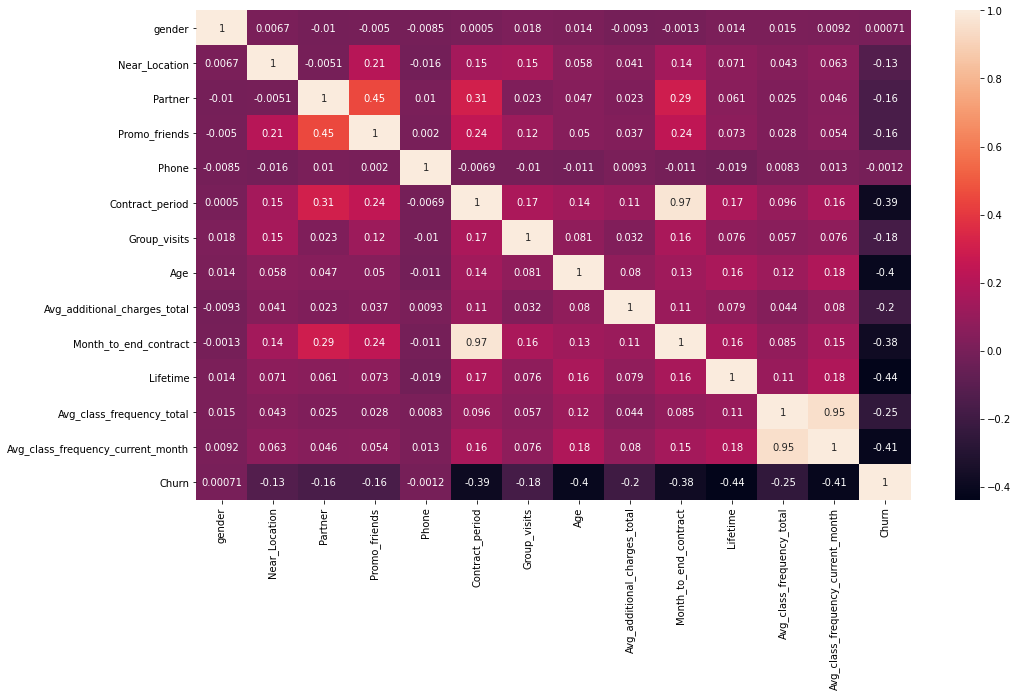

In [9]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

Очень сильно скоррелированны следущие пары переменных:  
`Срок до окончания текущего абонемента` - `Длительность текущего абонемента` и  
`Средняя частота посещений в неделю за текущий месяц` - `Средняя частота посещений в неделю за весь период`, стоит исключить что-то из вышеупомянутых пар переменных для правильного обучения модели классификации

# Шаг 3. Построение модели прогнозирования оттока клиентов

Импортируем библиотеки для обучения моделей

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [11]:
#исключим переменные средней частоты посещений и длительности текущего абонемента
X = df.drop(['Churn','Avg_class_frequency_total', 'Contract_period'], axis = 1)
y = df['Churn']

In [12]:
#разделим выборку на тренировочную и валидационную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print('Метрики для дерева принятия решения')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для дерева принятия решения
Accuracy: 0.91
Precision: 0.83
Recall: 0.79


In [14]:
lr_model = LogisticRegression(solver = 'newton-cg')
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_prediction)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_prediction)))

Метрики для логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.82


Модель случайного леса показала на 1% больше верно угаданных прогнозов и на 3% большую точность прогнозов

# Шаг 4. Кластеризация клиентов

## Шаг 4.1. Построение матрицу расстояний и отрисовка дендограммы

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop(['Churn'], axis = 1))

linked = linkage(X_sc, method = 'ward') 

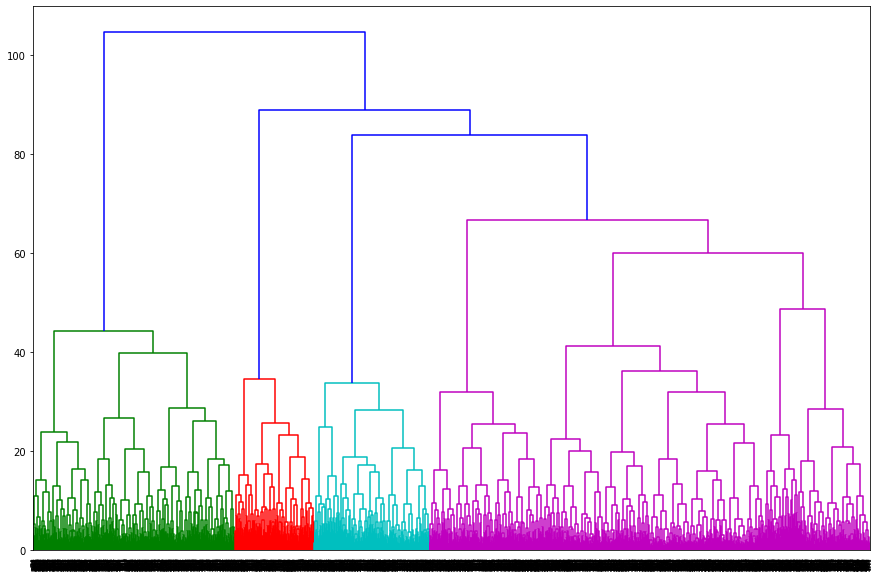

In [17]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Исходя из результатов дендограммы данные можно разделить на четыре кластера

## Шаг 4.2. Обучение модели кластеризации

С помощью алгоритма KMeans разделим данные на 5 кластеров, как требуется в задании

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters = 5, random_state =0)
labels = km.fit_predict(X_sc)
df['cluster'] = labels

## Шаг 4.3. Анализ полученных кластеров

Посмторим на средние значения получившихся кластеров

In [20]:
df.pivot_table(columns = 'cluster', aggfunc = 'mean')

cluster,0,1,2,3,4
Age,29.301299,28.136961,30.204327,28.499360,29.993590
Avg_additional_charges_total,143.957664,131.299377,164.628354,129.812508,164.563799
Avg_class_frequency_current_month,1.716369,1.086387,2.932554,1.176172,2.020129
Avg_class_frequency_total,1.847220,1.325794,2.926304,1.355379,2.028169
Churn,0.267532,0.550657,0.048077,0.395647,0.023504
Contract_period,4.787013,1.863039,2.734375,2.554417,11.352564
Group_visits,0.425974,0.324578,0.449519,0.303457,0.564103
Lifetime,3.924675,2.346154,5.007212,2.832266,4.817308
Month_to_end_contract,4.475325,1.787992,2.522837,2.370038,10.376068
Near_Location,0.862338,0.812383,0.858173,0.750320,0.943376


Можно выделить два кластера с наименьшей долей оттока (0 и 4) и кластер с наибольшей долей оттока (3)

Для кластеров 0 и 4 характерны следующие показатели:  
- Максимальные траты на сопутствующие услуги
- Наибольшая частота посещений за весь период (больше двух посещений в неделю)
- наибольшая доля посещения групповых занятий (0.55 и 0.47)
- Наибольшее время с момента первого посещения

Для кластера 3 характерны:
- Низкая посещаемость
- Наименьшая длительность абонементов
- Наименьшая доля клиентов из компаний-партнеров

In [21]:
for i in df.columns:
  fig = px.histogram(df, x=i,facet_col="cluster",width=900, height=300)
  fig.show()

In [22]:
df.groupby('cluster')['Churn'].mean()

cluster
0    0.267532
1    0.550657
2    0.048077
3    0.395647
4    0.023504
Name: Churn, dtype: float64

# Шаг 5. Выводы

Подводя итог исследования можно сделать следующие рекомендации сети фитнес-центров «Культурист-датасаентист»:  
- Основная цель это удержание клиента дольше одного месяца, можно предлагать более выгодные цены на абонементы на 3,6,12 месяцев (наверное, слишком очевидный совет)
- Исходя из статистики - стоит привлекать клиентов к дополнительным услугам
- Стимулировать регулярные посещения. Возможно, может помочь некая акция из разряда "за каждые 10 посещений получи бесплатное посещение какого-нибудь спа"
- Популяризировать групповые занятия.